In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Atividade 03 - Equipe 4 (Região Sudeste)

Integrantes:
* Caio dos Santos Nascimento
* Carlos Eduardo Cassimiro da Silva
* Gustavo Aldama Mourão Soares Pereira
* Letícia Rodrigues Neri







1) A sintaxe a seguir armazena os dados de **Relatório por município e agência** do ESTBAN em um único dataframe `df`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import seaborn as sns

In [ ]:
df = pd.DataFrame()
for i in range(1,10):
  filename = "/content/drive/MyDrive/ESTBAN2021/20210"+str(i)+"_ESTBAN_AG.CSV" # Geração do nome do arquivo
  dfAux = pd.read_csv(filename, sep=";",on_bad_lines='skip',encoding = "ISO-8859-1",  skiprows=2) # Para manipular o carregamento de CSV do ESTBAN
  df = pd.concat([df,dfAux], ignore_index=True) # Concatenação de dataframes
for i in range(10,13):
  filename = "/content/drive/MyDrive/ESTBAN2021/2021"+str(i)+"_ESTBAN_AG.CSV" # Geração do nome do arquivo
  dfAux = pd.read_csv(filename, sep=";",on_bad_lines='skip',encoding = "ISO-8859-1",  skiprows=2) # Para manipular o carregamento de CSV do ESTBAN
  df = pd.concat([df,dfAux], ignore_index=True) # Concatenação de dataframes

In [ ]:
df

#DATA_BASE   UF   CODMUN       MUNICIPIO      CNPJ  \
0           202101   AC  50830.0      ACRELANDIA         0   
1           202101   AC   9465.0    ASSIS BRASIL    360305   
2           202101   AC  35697.0       BRASILEIA         0   
3           202101   AC  35697.0       BRASILEIA    360305   
4           202101   AC  35697.0       BRASILEIA   4902979   
...            ...  ...      ...             ...       ...   
215496      202112   TO  17189.0  TOCANTINOPOLIS   4902979   
215497      202112   TO  17189.0  TOCANTINOPOLIS  60746948   
215498      202112   TO  14656.0         XAMBIOA         0   
215499      202112   TO  14656.0         XAMBIOA   4902979   
215500      202112  NaN      NaN             NaN  90400888   

                   NOME_INSTITUICAO          AGENCIA  VERBETE_110_ENCAIXE  \
0                BCO DO BRASIL S.A.  '00000000517569              1732345   
1           CAIXA ECONOMICA FEDERAL  '00360305358920              1732046   
2                BCO DO BRASIL S.A.  '00000000348945              1813675   
3           CAIXA ECONOMICA FEDERAL  '00360305341602              1479048   
4              BCO DA AMAZONIA S.A.  '04902979001205               357370   
...                             ...              ...                  ...   
215496         BCO DA AMAZONIA S.A.  '04902979005375               540691   
215497            BCO BRADESCO S.A.  '60746948688130              2542990   
215498           BCO DO BRASIL S.A.  '00000000244490               278518   
215499         BCO DA AMAZONIA S.A.  '04902979015761                13401   
215500  BCO SANTANDER (BRASIL) S.A.  '90400888310508               422187   

        VERBETE_111_CAIXA  VERBETE_112_DEPOSITOS_BANCARIOS  ...  \
0                 1732345                                0  ...   
1                 1732046                                0  ...   
2                 1813675                                0  ...   
3                 1479048                                0  ...   
4                  357370                                0  ...   
...                   ...                              ...  ...   
215496             540691                                0  ...   
215497            2542990                                0  ...   
215498             278518                                0  ...   
215499              13401                                0  ...   
215500             422187                                0  ...   

        VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS  \
0                                                   84122                                                                                                                                            
1                                                   10103                                                                                                                                            
2                                                  220491                                                                                                                                            
3                                                   18661                                                                                                                                            
4                                                   11013                                                                                                                                            
...                                                   ...                                                                                                                                            
215496                                              25801                                                                                          

Verifique que algumas linhas possuem CODMUN `NaN`:

In [ ]:
df[df['CODMUN'].isna()]

#DATA_BASE   UF  CODMUN MUNICIPIO      CNPJ  \
18606       202101  NaN     NaN       NaN  33147315   
18607       202101  NaN     NaN       NaN  61024352   
37219       202102  NaN     NaN       NaN  33147315   
55461       202103  NaN     NaN       NaN  33147315   
73631       202104  NaN     NaN       NaN  33147315   
144961      202108  NaN     NaN       NaN  90400888   
162665      202109  NaN     NaN       NaN  90400888   
180295      202110  NaN     NaN       NaN  90400888   
197895      202111  NaN     NaN       NaN  90400888   
215500      202112  NaN     NaN       NaN  90400888   

                   NOME_INSTITUICAO          AGENCIA  VERBETE_110_ENCAIXE  \
18606        BCO BRADESCO BERJ S.A.  '33147315003300                    0   
18607                  BANCO VOITER  '61024352000333                    0   
37219        BCO BRADESCO BERJ S.A.  '33147315003300                    0   
55461        BCO BRADESCO BERJ S.A.  '33147315003300                    0   
73631        BCO BRADESCO BERJ S.A.  '33147315003300                    0   
144961  BCO SANTANDER (BRASIL) S.A.  '90400888310508                    0   
162665  BCO SANTANDER (BRASIL) S.A.  '90400888310508               430998   
180295  BCO SANTANDER (BRASIL) S.A.  '90400888310508               296893   
197895  BCO SANTANDER (BRASIL) S.A.  '90400888310508               396439   
215500  BCO SANTANDER (BRASIL) S.A.  '90400888310508               422187   

        VERBETE_111_CAIXA  VERBETE_112_DEPOSITOS_BANCARIOS  ...  \
18606                   0                                0  ...   
18607                   0                                0  ...   
37219                   0                                0  ...   
55461                   0                                0  ...   
73631                   0                                0  ...   
144961                  0                                0  ...   
162665             430998                                0  ...   
180295             296893                                0  ...   
197895             396439                                0  ...   
215500             422187                                0  ...   

        VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS  \
18606                                                   0                                                                                                                                            
18607                                                   0                                                                                                                                            
37219                                                   0                                                                                                                                            
55461                                                   0                                                                                                                                            
73631                                                   0                                                                                                                                            
144961                                                  0                                                                                                                                            
162665                                               2121                                                                                                                                            
180295                                                249                                                                                                                                            
197895                            

Para a análise nesta atividade, vamos ignorar os bancos 

In [ ]:
df = df.dropna(subset=['CODMUN'])
df[df['CODMUN'].isna()]

Empty DataFrame
Columns: [#DATA_BASE, UF, CODMUN, MUNICIPIO, CNPJ, NOME_INSTITUICAO, AGENCIA, VERBETE_110_ENCAIXE, VERBETE_111_CAIXA, VERBETE_112_DEPOSITOS_BANCARIOS, VERBETE_113_BACEN_RESERV_BANC_EM_ESPECIE, VERBETE_114_APLIC_TEMPORARIAS_EM_OURO, VERBETE_120_APLIC_INTERFINANC_DE_LIQUIDEZ, VERBETE_130_TIT_E_VAL_MOB_E_INST_FIN_DERIV, VERBETE_140_REL_INTERFINANC_E_INTERDEPEND, VERBETE_141_CORRESPONDENTES_NO_EXTERIOR + VERBETE_142_CORRESPONDENTES_NO_PAIS, VERBETE_143_DEPEND_MATRIZ_E_CONGENERES_NO_EXTERIOR_EM, VERBETE_144_COBRANCA_EM_TRANSITO + VERBETE_145_ORDENS_DE_PAGAMENTO	+ VERBETE_146_VAL_LIGADAS_E_TERC_EM_TRANSITO + VERBETE_147_DEPENDENCIAS_NO_PAIS	+ VERBETE_152_SUPRIMENTOS_INTERDEPENDENCIAS, VERBETE_153_RELACOES_COM_A_CARTEIRA_DE_CAMBIO_E_DE_DESENVOL, VERBETE_158_OUTR_REL_INTERF_E_INTERDEPEND, VERBETE_160_OPERACOES_DE_CREDITO, VERBETE_161_EMPRES_E_TIT_DESCONTADOS, VERBETE_162_FINANCIAMENTOS, VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST, VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST, VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ, VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ, VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS, VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS, VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO, VERBETE_172_OUTROS_CREDITOS, VERBETE_173_CREDITOS_EM_LIQUIDACAO, VERBETE_174_PROV_P/_OPER_CREDITOS, VERBETE_176_OPERACOES_ESPECIAIS, VERBETE_180_ARRENDAMENTO_MERCANTIL, VERBETE_184_PROV_P/OPER_ARR_MERCANTIL, VERBETE_190_OUTROS_VALORES_E_BENS, VERBETE_200_PERMANENTE, VERBETE_300_CONTAS_DE_COMPENSACAO, VERBETE_399_TOTAL_DO_ATIVO, VERBETE_401_SERVICOS_PUBLICOS + VERBETE_402_ATIVIDADES_EMPRESARIAIS + VERBETE_403_ESPECIAIS_DO_TESOURO_NACIONAL + VERBETE_404_SALDOS_CREDORES_EM_CONTAS_DE_EMPRESTIMOS_E_FINAN + VERBETE_411_DE_PESSOAS_FISICAS + VERBETE_412_DE_PESSOAS_JURIDICAS + VERBETE_413_DE_INSTITUICOES_FINANCEIRAS + VERBETE_414_JUDICIAIS + VERBETE_415_OBRIGATORIOS + VERBETE_416_PARA_INVESTIMENTOS + VERBETE_417_VINCULADOS + VERBETE_418_DEMAIS_DEPOSITOS + VERBETE_419_SLD_CRED_CTAS_EMPR_FINANC_OUTR, VERBETE_420_DEPOSITOS_DE_POUPANCA, VERBETE_430_DEPOSITOS_INTERIFNANCEIROS, VERBETE_431_DEPOSITOS_INTERFINANCEIROS, VERBETE_432_DEPOSITOS_A_PRAZO, VERBETE_433_CAPTACEOS_NO_MERCADO_ABERTO, VERBETE_440_REL_INTERFINANC_E_INTERDEPEND, VERBETE_441_CORRESPONDENTES_NO_EXTERIOR + VERBETE_442_CORRESPONDENTES_NO_PAIS, VERBETE_443_DEPENDENCIAS_MATRIZ_E_CONGENERES_NO_EXTERIOR, VERBETE_444_COBRANCA_EM_TRANSITO + VERBETE_445_ORDENS_DE_PAGAMENTO + VERBETE_446_VAL_DE_LIG_E_TERC_EM_TRANSITO + VERBETE_447_DEPENDENCIAS_NO_PAIS + VERBETE_456_SUPRIM_INTERDEPARTAMENTAIS + VERBETE_458_OUTR_REL_INTERFIN_INTERDEPEND, VERBETE_457_RELACOES_COM_A_CARTEIRA_DE_CAMBIO_E_DE_DESENVOLV, VERBETE_460_OBRIG_POR_EMP_E_REPASSES, VERBETE_461_BANCO_CENTRAL_ASSISTENCIA_FINANCEIRA + VERBETE_462_REDESCONTO + VERBETE_463_REFINANCIAMENTOS + VERBETE_467_OPERACOES_ESPECIAIS + VERBETE_468_OUTR_OBRIG_POR_EMPR_E_REPASSES, VERBETE_470_INST_FINANCEIROS_DERIVATIVOS, VERBETE_480_OBRIGACOES_POR_RECEBIMENTO, VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS, VERBETE_486_PIS/PASEP, VERBETE_490_CHEQUES_ADMINISTRATIVOS + VERBETE_500_OUTRAS_OBRIGACOES, VERBETE_610_PATRIMONIO_LIQUIDO, VERBETE_710_CONTAS_DE_RESULTADO, VERBETE_711_CONTAS_CREDORAS, VERBETE_712_CONTAS_DEVEDORAS, VERBETE_800_CONTAS_DE_COMPENSACAO, VERBETE_899_TOTAL_DO_PASSIVO, CODMUN_IBGE]
Index: []

[0 rows x 65 columns]

Podemos visualizar quais colunas estão presentes no dataset:

In [ ]:
df.columns

Index(['#DATA_BASE', 'UF', 'CODMUN', 'MUNICIPIO', 'CNPJ', 'NOME_INSTITUICAO',
       'AGENCIA', 'VERBETE_110_ENCAIXE', 'VERBETE_111_CAIXA',
       'VERBETE_112_DEPOSITOS_BANCARIOS',
       'VERBETE_113_BACEN_RESERV_BANC_EM_ESPECIE',
       'VERBETE_114_APLIC_TEMPORARIAS_EM_OURO',
       'VERBETE_120_APLIC_INTERFINANC_DE_LIQUIDEZ',
       'VERBETE_130_TIT_E_VAL_MOB_E_INST_FIN_DERIV',
       'VERBETE_140_REL_INTERFINANC_E_INTERDEPEND',
       'VERBETE_141_CORRESPONDENTES_NO_EXTERIOR + VERBETE_142_CORRESPONDENTES_NO_PAIS',
       'VERBETE_143_DEPEND_MATRIZ_E_CONGENERES_NO_EXTERIOR_EM',
       'VERBETE_144_COBRANCA_EM_TRANSITO + VERBETE_145_ORDENS_DE_PAGAMENTO\t+ VERBETE_146_VAL_LIGADAS_E_TERC_EM_TRANSITO + VERBETE_147_DEPENDENCIAS_NO_PAIS\t+ VERBETE_152_SUPRIMENTOS_INTERDEPENDENCIAS',
       'VERBETE_153_RELACOES_COM_A_CARTEIRA_DE_CAMBIO_E_DE_DESENVOL',
       'VERBETE_158_OUTR_REL_INTERF_E_INTERDEPEND',
       'VERBETE_160_OPERACOES_DE_CREDITO',
       'VERBETE_161_EMPRES_E_TIT_DESCONTAD

Vamos utilizar as colunas: `VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST`,
       `VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST`,
       `VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ`,
       `VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ`, e `VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS`, que correspondem às colunas `23-26` e `28` do nosso dataframe:

In [ ]:
cols = df.columns
selectedCols = []
# selecionando colunas 0-6, 20, 28 e última coluna do dataframe
selectedCols = list(cols[0:7]) + list(cols[23:27]) + [cols[28],cols[-1]]
selectedCols

['#DATA_BASE',
 'UF',
 'CODMUN',
 'MUNICIPIO',
 'CNPJ',
 'NOME_INSTITUICAO',
 'AGENCIA',
 'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
 'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
 'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
 'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
 'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS',
 'CODMUN_IBGE']

Vamos manter apenas essas colunas no nosso dataframe. Podemos fazer da forma a seguir:

In [ ]:
df = df.drop(df.columns.difference(selectedCols), axis=1)
df.head()

#DATA_BASE  UF   CODMUN     MUNICIPIO     CNPJ         NOME_INSTITUICAO  \
0      202101  AC  50830.0    ACRELANDIA        0       BCO DO BRASIL S.A.   
1      202101  AC   9465.0  ASSIS BRASIL   360305  CAIXA ECONOMICA FEDERAL   
2      202101  AC  35697.0     BRASILEIA        0       BCO DO BRASIL S.A.   
3      202101  AC  35697.0     BRASILEIA   360305  CAIXA ECONOMICA FEDERAL   
4      202101  AC  35697.0     BRASILEIA  4902979     BCO DA AMAZONIA S.A.   

           AGENCIA  VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST  \
0  '00000000517569                                    79697462   
1  '00360305358920                                           0   
2  '00000000348945                                    63185610   
3  '00360305341602                                           0   
4  '04902979001205                                       10132   

   VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS  CODMUN_IBGE  
0                                   113931    1200013.0  
1                                   479184    1200054.0  
2                                   238792    1200104.0  
3                                 13966356    1200104.0  
4                                        0    1200104.0

Vamos verificar os `dtypes` do nosso dataframe

In [ ]:
df.dtypes

#DATA_BASE                                       int64
UF                                              object
CODMUN                                         float64
MUNICIPIO                                       object
CNPJ                                             int64
NOME_INSTITUICAO                                object
AGENCIA                                         object
VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST       int64
VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST        int64
VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ       int64
VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ      int64
VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS          int64
CODMUN_IBGE                                    float64
dtype: object

Verifique que o tipo de dados da coluna `CODMUN_IBGE` está em float. Por ser um código, o ideal é que o tipo esteja como string, sem o decimal. Vamos converter inicialmente para inteiro e, posteriormente, para string:

In [ ]:
df = df.astype({'CODMUN_IBGE': 'int64'})
df = df.astype({'CODMUN_IBGE': 'str'})
df.dtypes

#DATA_BASE                                       int64
UF                                              object
CODMUN                                         float64
MUNICIPIO                                       object
CNPJ                                             int64
NOME_INSTITUICAO                                object
AGENCIA                                         object
VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST       int64
VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST        int64
VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ       int64
VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ      int64
VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS          int64
CODMUN_IBGE                                     object
dtype: object

In [ ]:
df.head()

#DATA_BASE  UF   CODMUN     MUNICIPIO     CNPJ         NOME_INSTITUICAO  \
0      202101  AC  50830.0    ACRELANDIA        0       BCO DO BRASIL S.A.   
1      202101  AC   9465.0  ASSIS BRASIL   360305  CAIXA ECONOMICA FEDERAL   
2      202101  AC  35697.0     BRASILEIA        0       BCO DO BRASIL S.A.   
3      202101  AC  35697.0     BRASILEIA   360305  CAIXA ECONOMICA FEDERAL   
4      202101  AC  35697.0     BRASILEIA  4902979     BCO DA AMAZONIA S.A.   

           AGENCIA  VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST  \
0  '00000000517569                                    79697462   
1  '00360305358920                                           0   
2  '00000000348945                                    63185610   
3  '00360305341602                                           0   
4  '04902979001205                                       10132   

   VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS CODMUN_IBGE  
0                                   113931     1200013  
1                                   479184     1200054  
2                                   238792     1200104  
3                                 13966356     1200104  
4                                        0     1200104

Vamos agrupar os dados a partir do codigo de município IBGE. Iremos selecionar as colunas que contém a informação que queremos agrupar. Vamos selecionar as devidas colunas 

In [ ]:
selectedCols = df.columns[7:-1]
selectedCols

Index(['VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
       'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
       'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
       'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
       'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS'],
      dtype='object')

Em seguida, agruparemos pela variável CODMUN_IBGE, calculando a média do saldo de financiamentos agropecuários e imobiliários.

OBS: O dataframe gerado irá conter a média do saldo de financiamento (agropecuários e imobiliários) de todos os bancos em uma cidade. É possível (e provável) que agências tenham sido criadas ou encerradas durante esse tempo. Portanto, é recomendado fazer uma avaliação mais minuciosa da evolução desses dados ao longo do tempo.

In [ ]:
groupedDf = df.groupby(["CODMUN_IBGE"])[selectedCols].agg('mean')
groupedDf.reset_index(inplace = True)
groupedDf.set_index("CODMUN_IBGE", inplace = True)
groupedDf.head()

VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST  \
CODMUN_IBGE                                               
1100015                                    6.954659e+07   
1100023                                    9.868998e+07   
1100049                                    3.784675e+07   
1100056                                    5.598274e+07   
1100064                                    5.285291e+07   

             VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST  \
CODMUN_IBGE                                              
1100015                                            0.0   
1100023                                            0.0   
1100049                                            0.0   
1100056                                            0.0   
1100064                                            0.0   

             VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ  \
CODMUN_IBGE                                               
1100015                                             0.0   
1100023                                             0.0   
1100049                                             0.0   
1100056                                             0.0   
1100064                                             0.0   

             VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ  \
CODMUN_IBGE                                                
1100015                                              0.0   
1100023                                              0.0   
1100049                                              0.0   
1100056                                              0.0   
1100064                                              0.0   

             VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS  
CODMUN_IBGE                                           
1100015                                 9.939624e+06  
1100023                                 4.145580e+07  
1100049                                 4.382286e+07  
1100056                                 6.153018e+06  
1100064                                 4.447830e+06

Vamos inserir no dataframe a informação populacional. Utilizaremos a estimativa populacional para 2021:

In [ ]:
url = "https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2021/variaveis/9324?localidades=N6[N2[1,2,3,4,5]]"
response = requests.get(url)
population = response.json()
for item in population:
  for key in item['resultados']:
    populationJson = key
populationJson.pop('classificacoes')
dfPopulation = pd.json_normalize(populationJson['series'])
dfPopulation.rename(columns = {dfPopulation.columns[0]:'CODMUN_IBGE', 
                         dfPopulation.columns[-1]: 'POPULACAO'},
             inplace = True)
dfPopulation[['CIDADE','UF']] = dfPopulation[dfPopulation.columns[-2]].str.split(' - ',1).tolist()
dfPopulation.set_index('CODMUN_IBGE', inplace = True)
dfPopulation.drop(dfPopulation.columns[0:3], axis=1,inplace=True)
dfPopulation = dfPopulation.astype({'POPULACAO': 'int64'})
dfPopulation.head()

POPULACAO                 CIDADE  UF
CODMUN_IBGE                                      
1100015          22516  Alta Floresta D'Oeste  RO
1100023         111148              Ariquemes  RO
1100031           5067                 Cabixi  RO
1100049          86416                 Cacoal  RO
1100056          16088             Cerejeiras  RO

Vamos obter, também, a área de cada município:

In [ ]:
# Obtendo a área territorial de todos os municípios Brasileiros
url = "https://servicodados.ibge.gov.br/api/v3/agregados/1301/periodos/2010/variaveis/615?localidades=N6[N2[1,2,3,4,5]]"
response = requests.get(url)
area = response.json()
for item in area:
  for key in item['resultados']:
    areaJson = key
areaJson.pop('classificacoes')
dfArea = pd.json_normalize(areaJson['series'])
dfArea.drop(columns=[dfArea.columns[1],
                    dfArea.columns[2],
                    dfArea.columns[3]],
           inplace=True)
dfArea.rename(columns = {dfArea.columns[0]:'CODMUN_IBGE', 
                       dfArea.columns[1]: 'AREA'},
             inplace = True)
dfArea.set_index('CODMUN_IBGE', inplace = True)
dfArea = dfArea.astype({'AREA': 'float'})
dfArea.head()

AREA
CODMUN_IBGE        
1100015      7067.0
1100023      4426.6
1100031      1314.4
1100049      3792.8
1100056      2783.3

Vamos agrupar os dataframe de população e área ao dataframe dos financiamentos. Os municípios que não apresentarem saldo de financiamento (não possuírem agências), teão valores zero atribuídos.

In [ ]:
df = pd.DataFrame()
df = dfPopulation.merge(dfArea,left_index=True, right_index=True, how='outer')
df.head()

POPULACAO                 CIDADE  UF    AREA
CODMUN_IBGE                                              
1100015          22516  Alta Floresta D'Oeste  RO  7067.0
1100023         111148              Ariquemes  RO  4426.6
1100031           5067                 Cabixi  RO  1314.4
1100049          86416                 Cacoal  RO  3792.8
1100056          16088             Cerejeiras  RO  2783.3

Vamos, agora, agrupar os dataframes dos dados bancários aos dados do IBGE:

In [ ]:
df = df.merge(groupedDf,left_index=True, right_index=True, how='outer').fillna(0)
df.head()

POPULACAO                 CIDADE  UF    AREA  \
CODMUN_IBGE                                                 
1100015          22516  Alta Floresta D'Oeste  RO  7067.0   
1100023         111148              Ariquemes  RO  4426.6   
1100031           5067                 Cabixi  RO  1314.4   
1100049          86416                 Cacoal  RO  3792.8   
1100056          16088             Cerejeiras  RO  2783.3   

             VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST  \
CODMUN_IBGE                                               
1100015                                    6.954659e+07   
1100023                                    9.868998e+07   
1100031                                    0.000000e+00   
1100049                                    3.784675e+07   
1100056                                    5.598274e+07   

             VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST  \
CODMUN_IBGE                                              
1100015                                            0.0   
1100023                                            0.0   
1100031                                            0.0   
1100049                                            0.0   
1100056                                            0.0   

             VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ  \
CODMUN_IBGE                                               
1100015                                             0.0   
1100023                                             0.0   
1100031                                             0.0   
1100049                                             0.0   
1100056                                             0.0   

             VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ  \
CODMUN_IBGE                                                
1100015                                              0.0   
1100023                                              0.0   
1100031                                              0.0   
1100049                                              0.0   
1100056                                              0.0   

             VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS  
CODMUN_IBGE                                           
1100015                                 9.939624e+06  
1100023                                 4.145580e+07  
1100031                                 0.000000e+00  
1100049                                 4.382286e+07  
1100056                                 6.153018e+06

In [ ]:
df.dtypes

POPULACAO                                        int64
CIDADE                                          object
UF                                              object
AREA                                           float64
VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST     float64
VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST      float64
VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ     float64
VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ    float64
VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS        float64
dtype: object

Vamos somar as colunas de financiamento agropecuário, dividir pela população e salva-lo em uma nova coluna. Também, vamos calcular os financiamentos imobiliários per capita:

In [ ]:
df['fin_agro_per_capita'] = df.iloc[:,4:8].sum(axis=1)/df['POPULACAO']
df['fin_imob_per_capita'] = df.iloc[:,8]/df['POPULACAO']
df.head()

POPULACAO                 CIDADE  UF    AREA  \
CODMUN_IBGE                                                 
1100015          22516  Alta Floresta D'Oeste  RO  7067.0   
1100023         111148              Ariquemes  RO  4426.6   
1100031           5067                 Cabixi  RO  1314.4   
1100049          86416                 Cacoal  RO  3792.8   
1100056          16088             Cerejeiras  RO  2783.3   

             VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST  \
CODMUN_IBGE                                               
1100015                                    6.954659e+07   
1100023                                    9.868998e+07   
1100031                                    0.000000e+00   
1100049                                    3.784675e+07   
1100056                                    5.598274e+07   

             VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST  \
CODMUN_IBGE                                              
1100015                                            0.0   
1100023                                            0.0   
1100031                                            0.0   
1100049                                            0.0   
1100056                                            0.0   

             VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ  \
CODMUN_IBGE                                               
1100015                                             0.0   
1100023                                             0.0   
1100031                                             0.0   
1100049                                             0.0   
1100056                                             0.0   

             VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ  \
CODMUN_IBGE                                                
1100015                                              0.0   
1100023                                              0.0   
1100031                                              0.0   
1100049                                              0.0   
1100056                                              0.0   

             VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS  fin_agro_per_capita  \
CODMUN_IBGE                                                                 
1100015                                 9.939624e+06          3088.763196   
1100023                                 4.145580e+07           887.915046   
1100031                                 0.000000e+00             0.000000   
1100049                                 4.382286e+07           437.959951   
1100056                                 6.153018e+06          3479.782224   

             fin_imob_per_capita  
CODMUN_IBGE                       
1100015               441.447171  
1100023               372.978400  
1100031                 0.000000  
1100049               507.115075  
1100056               382.460110

Agora podemos excluir as demais colunas do dataframe:

In [ ]:
selectedCols = ["POPULACAO","CIDADE","UF","AREA","fin_agro_per_capita","fin_imob_per_capita"]
df = df.drop(df.columns.difference(selectedCols), axis=1)
df.head()

POPULACAO                 CIDADE  UF    AREA  \
CODMUN_IBGE                                                 
1100015          22516  Alta Floresta D'Oeste  RO  7067.0   
1100023         111148              Ariquemes  RO  4426.6   
1100031           5067                 Cabixi  RO  1314.4   
1100049          86416                 Cacoal  RO  3792.8   
1100056          16088             Cerejeiras  RO  2783.3   

             fin_agro_per_capita  fin_imob_per_capita  
CODMUN_IBGE                                            
1100015              3088.763196           441.447171  
1100023               887.915046           372.978400  
1100031                 0.000000             0.000000  
1100049               437.959951           507.115075  
1100056              3479.782224           382.460110

In [ ]:
df.describe()

POPULACAO           AREA  fin_agro_per_capita  fin_imob_per_capita
count  5.570000e+03    5570.000000          5570.000000          5570.000000
mean   3.829760e+04    1526.522298           808.676934           216.957561
std    2.242882e+05    5619.951549          2627.609954           516.846080
min    7.710000e+02       0.000000             0.000000             0.000000
25%    5.454000e+03     204.225000             0.000000             0.000000
50%    1.173200e+04     415.850000             0.027515             0.000000
75%    2.576475e+04    1023.025000           350.257154           204.909170
max    1.239637e+07  159533.400000         38981.511649         13053.410437

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

Iremos selecionar apenas os municípios da região sudeste




In [ ]:
dfMG = df[df['UF'] =='MG']
dfES = df[df['UF'] =='ES']
dfSP = df[df['UF'] =='SP']
dfRJ = df[df['UF'] =='RJ']


In [ ]:
df = dfMG.append(dfES)
df = df.append(dfSP)
df = df.append(dfRJ)

In [ ]:
df

POPULACAO               CIDADE  UF    AREA  fin_agro_per_capita  \
CODMUN_IBGE                                                                    
3100104           7022  Abadia dos Dourados  MG   881.1             0.000000   
3100203          23263               Abaeté  MG  1817.1          1096.029547   
3100302          13434           Abre Campo  MG   470.6          3483.163149   
3100401           3995              Acaiaca  MG   101.9             0.000000   
3100500           9270              Açucena  MG   815.4             0.000000   
...                ...                  ...  ..     ...                  ...   
3306008          82468            Três Rios  RJ   326.1             5.643157   
3306107          77202              Valença  RJ  1304.8            32.088634   
3306156          11208            Varre-Sai  RJ   190.1           726.894465   
3306206          37262            Vassouras  RJ   538.1            16.681196   
3306305         274925        Volta Redonda  RJ   182.5             2.168055   

             fin_imob_per_capita  
CODMUN_IBGE                       
3100104                 0.000000  
3100203              1545.628889  
3100302                71.535947  
3100401                 0.000000  
3100500                 0.000000  
...                          ...  
3306008               230.103840  
3306107               111.065494  
3306156                 8.147071  
3306206               459.768529  
3306305               111.723679  

[1668 rows x 6 columns]

Clusterização em 5 clusters

In [ ]:
X = df[['fin_agro_per_capita', 'fin_imob_per_capita']].to_numpy()

In [ ]:
cl = KMeans(n_clusters=5, random_state=0).fit(X)
clusters = pd.DataFrame(cl.labels_, columns=['cluster'])

detail = pd.merge(left=df.reset_index(), right=clusters, left_index=True, right_index=True)
detail = detail.astype({'cluster': 'str'})

fig = px.scatter(detail, x="fin_agro_per_capita", y="fin_imob_per_capita", color="cluster",hover_name='CIDADE')
fig.update_layout(yaxis_title='Financiamento Imobiliário Per Capita')
fig.update_layout(xaxis_title='Financiamento Agropecuário Per Capita')
fig.show()

Gerando um mapa cloroplético:

In [ ]:
#Obtendo os shapes dos municípios de cada estado
url_MG = 'https://servicodados.ibge.gov.br/api/v3/malhas/estados/31?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio'
response = requests.get(url_MG)
shapesJson_MG = response.json()

url_ES = 'https://servicodados.ibge.gov.br/api/v3/malhas/estados/32?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio'
response = requests.get(url_ES)
shapesJson_ES = response.json()

url_SP = 'https://servicodados.ibge.gov.br/api/v3/malhas/estados/35?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio'
response = requests.get(url_SP)
shapesJson_SP = response.json()

url_RJ = 'https://servicodados.ibge.gov.br/api/v3/malhas/estados/33?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio'
response = requests.get(url_RJ)
shapesJson_RJ = response.json()

In [ ]:
shapesJson_SUD = shapesJson_MG
shapesJson_SUD['features'] = shapesJson_MG['features'] + shapesJson_ES['features']+shapesJson_SP['features']+shapesJson_RJ['features']

In [ ]:
detail['cluster'] = detail['cluster'].astype(str)
br_lat = -20.0
br_lon = -43.0

brazilMap = px.choropleth_mapbox(detail,
                geojson = shapesJson_SUD, 
                locations = df.index,
                hover_name = 'CIDADE',
                color='cluster', 
                featureidkey = "properties.codarea",
                )
brazilMap.update_layout(mapbox_style="open-street-map", 
                        mapbox_zoom=4.4,
                        mapbox_center = {"lat": br_lat, "lon": br_lon},
                            title="Clusterização para Finaciamento Imobiliário e Agropecuário - Região Sudeste")
brazilMap.show()

2) Chamada da API do IBGE com o PIB por município em 2019 (ano mais recente disponível)

In [ ]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/2019/variaveis/37?localidades=N6[N3[31,32,33,35]]'
response = requests.get(url)
resp = response.json()
print(resp)

In [ ]:
for item in resp:
  for key in item['resultados']:
    respJson = key
respJson.pop('classificacoes')

[]

Tratamento para do dataframe para plotagem dos boxplots

In [ ]:
pib_sud = pd.json_normalize(respJson['series'])
pib_sud.drop(columns=[pib_sud.columns[1],
                    pib_sud.columns[2],
                    pib_sud.columns[3]],
           inplace=True)
pib_sud = pib_sud.drop([0,1,2,3], axis = 'index')
pib_sud['localidade.id'] = pib_sud['localidade.id'].astype(int)
pib_sud['serie.2019'] = pib_sud['serie.2019'].astype(float)
pib_sud.rename(columns = {pib_sud.columns[0]:'CODMUN_IBGE', 
                       pib_sud.columns[1]:'PIB'},
             inplace = True)

In [ ]:
pib_sud

CODMUN_IBGE        PIB
4         3100500    93572.0
5         3100609   146608.0
6         3100708   144083.0
7         3100807    62088.0
8         3100906   258525.0
...           ...        ...
1663      3557006  3406950.0
1664      3557105  2953318.0
1665      3557154    90520.0
1666      3557204   213106.0
1667      3557303   318731.0

[1664 rows x 2 columns]

In [ ]:
pib_0 = []
pib_1 = []
pib_2 = []
pib_3 = []
pib_4 = []

In [ ]:
lista_0 = list(detail["CODMUN_IBGE"].astype(int))
lista_1 = list(detail["cluster"].astype(int))
dicio = dict(zip(lista_0,lista_1))
dicio[3501400]

4

In [ ]:
for i in pib_sud.index:
  if dicio[pib_sud['CODMUN_IBGE'][i]] == 0:
    pib_0.append(pib_sud.loc[i]['PIB'])
  elif dicio[pib_sud['CODMUN_IBGE'][i]] == 1:
    pib_1.append(pib_sud['PIB'][i])
  elif dicio[pib_sud['CODMUN_IBGE'][i]] == 2:
    pib_2.append(pib_sud['PIB'][i])
  elif dicio[pib_sud['CODMUN_IBGE'][i]] == 3:
    pib_3.append(pib_sud['PIB'][i])
  else:
    pib_4.append(pib_sud['PIB'][i])

In [ ]:
pib_clusters = []
pib_clusters.append(pib_0)
pib_clusters.append(pib_1)
pib_clusters.append(pib_2)
pib_clusters.append(pib_3)
pib_clusters.append(pib_4)

Plotagem dos boxplots, na mesma ordem e dos clusters do mapa cloroplético

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
names = ['0','1','2','3','4']
fig.add_trace(go.Box(x=pib_clusters[4],name=names[4]))
fig.add_trace(go.Box(x=pib_clusters[0],name=names[0]))
fig.add_trace(go.Box(x=pib_clusters[1],name=names[1]))
fig.add_trace(go.Box(x=pib_clusters[2],name=names[2]))
fig.add_trace(go.Box(x=pib_clusters[3],name=names[3]))

fig.update_layout(xaxis_title='PIB')
fig.show()

Vemos acima que o cluster 4 aprenseta dois grandes outliers, que segundo o mapa cloroplético, são as cidades de São Paulo e Rio de Janeiro. Retiramos elas para facilitar a visualização dos outliers

In [ ]:
pib_4.remove(max(pib_4))

In [ ]:
pib_4.remove(max(pib_4))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
names = ['0','1','2','3','4']
fig.add_trace(go.Box(x=pib_clusters[4],name=names[4]))
fig.add_trace(go.Box(x=pib_clusters[0],name=names[0]))
fig.add_trace(go.Box(x=pib_clusters[1],name=names[1]))
fig.add_trace(go.Box(x=pib_clusters[2],name=names[2]))
fig.add_trace(go.Box(x=pib_clusters[3],name=names[3]))

fig.update_layout(xaxis_title='PIB')
fig.show()

Podemos notar do gráfico acima que cada clusters possuem distribuições de PIB próprias, além de que:

*   Cluster 4 apresenta grande número de outliers, ao contrario dos outros, indicando que nele há cidades de níveis econômicos variados.
*   Clusters 1 e 3 são muito semelhantes, que corrobora com o mapa cloroplético, em que as cidades de ambos são próximas, e segundo o gráfico de clusterização, tem a predominância do Financimanento Agropecuário.

3) Aplicando o critério de inercia para traçar o gráfico de cotovelo de 2 a 10 clusters

In [ ]:

y=[]  # Start with an empty df
for n in range(2,11):  # loop from 1 to 7 clusters
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    y.append(kmeans.inertia_) 
y

[1679760980.6087687,
 871467344.5320133,
 649836295.8913529,
 489066524.24999416,
 388801220.3527378,
 301909041.8897274,
 244947177.77912748,
 209164489.14213473,
 178831088.88700628]

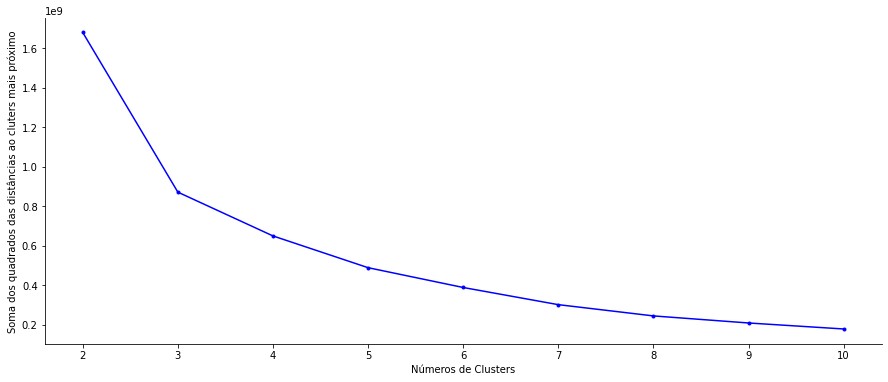

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(range(2,11), y, color='blue', marker='.')

ax.set_xlabel('Números de Clusters')

ax.set_ylabel('Soma dos quadrados das distâncias ao cluters mais próximo')

sns.despine(ax=ax)

Temos uma grande queda de 2 para 3 clusters, seguida de quedas menores a medida que aumenta k aumenta. Contudo, a partir de k=9, o gráfico torna-se praticamente linar. Com isso recomendamos 10 clusters para esse problema.

4) Precisaremos fazer 4 chamadas da API do IBGE para cada município da região Sudeste:


In [ ]:
# Estimativa Populacional para 2021
url = "https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2021/variaveis/9324?localidades=N6[N3[31,32,33,35]]"
response = requests.get(url)
population = response.json()
for item in population:
  for key in item['resultados']:
    populationJson = key
populationJson.pop('classificacoes')
dfPopulation = pd.json_normalize(populationJson['series'])
dfPopulation.rename(columns = {dfPopulation.columns[0]:'CODMUN_IBGE', 
                         dfPopulation.columns[-1]: 'POPULACAO'},
             inplace = True)
dfPopulation[['CIDADE','UF']] = dfPopulation[dfPopulation.columns[-2]].str.split(' - ',1).tolist()
dfPopulation.set_index('CODMUN_IBGE', inplace = True)
dfPopulation.drop(dfPopulation.columns[0:3], axis=1,inplace=True)
dfPopulation = dfPopulation.astype({'POPULACAO': 'int64'})
dfPopulation.head()

POPULACAO               CIDADE  UF
CODMUN_IBGE                                    
3100104           7022  Abadia dos Dourados  MG
3100203          23263               Abaeté  MG
3100302          13434           Abre Campo  MG
3100401           3995              Acaiaca  MG
3100500           9270              Açucena  MG

In [ ]:
# Área territorial
url = "https://servicodados.ibge.gov.br/api/v3/agregados/1301/periodos/2010/variaveis/615?localidades=N6[N3[31,32,33,35]]"
response = requests.get(url)
area = response.json()
for item in area:
  for key in item['resultados']:
    areaJson = key
areaJson.pop('classificacoes')
dfArea = pd.json_normalize(areaJson['series'])
dfArea.drop(columns=[dfArea.columns[1],
                    dfArea.columns[2],
                    dfArea.columns[3]],
           inplace=True)
dfArea.rename(columns = {dfArea.columns[0]:'CODMUN_IBGE', 
                       dfArea.columns[1]: 'AREA'},
             inplace = True)
dfArea.set_index('CODMUN_IBGE', inplace = True)
dfArea = dfArea.astype({'AREA': 'float'})
dfArea.head()

AREA
CODMUN_IBGE        
3100104       881.1
3100203      1817.1
3100302       470.6
3100401       101.9
3100500       815.4

In [ ]:
# Valor adicionado da agropecuário ao PIB municipal
url = "https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/2019/variaveis/513?localidades=N6[N3[31,32,33,35]]"
response = requests.get(url)
agropec = response.json()
for item in agropec:
  for key in item['resultados']:
    AgropecJson = key
AgropecJson.pop('classificacoes')
dfAgropec = pd.json_normalize(AgropecJson['series'])
dfAgropec.drop(columns=[dfAgropec.columns[1],
                    dfAgropec.columns[2],
                    dfAgropec.columns[3]],
           inplace=True)
dfAgropec.rename(columns = {dfAgropec.columns[0]:'CODMUN_IBGE', 
                       dfAgropec.columns[1]:'AGROPEC'},
             inplace = True)
dfAgropec.set_index('CODMUN_IBGE', inplace = True)
dfAgropec = dfAgropec.astype({'AGROPEC': 'float'})
dfAgropec.head()

AGROPEC
CODMUN_IBGE         
3100104      32757.0
3100203      91437.0
3100302      27236.0
3100401       2344.0
3100500      10876.0

In [ ]:
# Pib
url = "https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/2019/variaveis/37?localidades=N6[N3[31,32,33,35]]"
response = requests.get(url)
pib = response.json()
for item in pib:
  for key in item['resultados']:
    PibJson = key
PibJson.pop('classificacoes')
dfPib = pd.json_normalize(PibJson['series'])
dfPib.drop(columns=[dfPib.columns[1],
                    dfPib.columns[2],
                    dfPib.columns[3]],
                    inplace=True)
dfPib.rename(columns = {dfPib.columns[0]:'CODMUN_IBGE', 
                       dfPib.columns[1]:'PIB'},
             inplace = True)
dfPib.set_index('CODMUN_IBGE', inplace = True)
dfPib = dfPib.astype({'PIB': 'float'})
dfPib.head()

PIB
CODMUN_IBGE          
3100104      127582.0
3100203      517315.0
3100302      203468.0
3100401       55846.0
3100500       93572.0

In [ ]:
df = pd.DataFrame()
df = dfPopulation.merge(dfArea,left_index=True, right_index=True, how='outer')
df = df.merge(dfAgropec,left_index=True, right_index=True, how='outer')
df = df.merge(dfPib,left_index=True, right_index=True, how='outer')
df.head()

POPULACAO               CIDADE  UF    AREA  AGROPEC       PIB
CODMUN_IBGE                                                               
3100104           7022  Abadia dos Dourados  MG   881.1  32757.0  127582.0
3100203          23263               Abaeté  MG  1817.1  91437.0  517315.0
3100302          13434           Abre Campo  MG   470.6  27236.0  203468.0
3100401           3995              Acaiaca  MG   101.9   2344.0   55846.0
3100500           9270              Açucena  MG   815.4  10876.0   93572.0

Vamos calcular a densidade demográfica, e a porcentagem da agropecuária sobre o pib e adicionar em novas tabelas, e retir colunas que nao usaremos na analise da classificação dos municípios.

In [ ]:
df['DENS_DEMOGRAFICA'] = df['POPULACAO']/df['AREA']
df['PERCENTUAL_AGROPEC'] = 100*df['AGROPEC']/df['PIB']
df=df.drop(['UF','AGROPEC','AREA','PIB'], axis ='columns')
df.head()

POPULACAO               CIDADE  DENS_DEMOGRAFICA  \
CODMUN_IBGE                                                     
3100104           7022  Abadia dos Dourados          7.969583   
3100203          23263               Abaeté         12.802267   
3100302          13434           Abre Campo         28.546536   
3100401           3995              Acaiaca         39.205103   
3100500           9270              Açucena         11.368653   

             PERCENTUAL_AGROPEC  
CODMUN_IBGE                      
3100104               25.675252  
3100203               17.675304  
3100302               13.385889  
3100401                4.197257  
3100500               11.623135

In [ ]:
df['classificacao'] = None
for i in df.index:
  if df['POPULACAO'][i] < 50000 and df['PERCENTUAL_AGROPEC'][i] > 33.3333 and df['DENS_DEMOGRAFICA'][i] < 80:
    df['classificacao'][i] = 'RURAL'
  elif df['POPULACAO'][i] < 50000 and df['PERCENTUAL_AGROPEC'][i] > 15 and df['PERCENTUAL_AGROPEC'][i] < 33.3333 and df['DENS_DEMOGRAFICA'][i] < 80:
    df['classificacao'][i] = 'RELATIVAMENTE RURAL'
  elif (df['POPULACAO'][i] < 50000 and df['PERCENTUAL_AGROPEC'][i] < 15.0000 and df['DENS_DEMOGRAFICA'][i] < 80) or (df['POPULACAO'][i] < 20000 and df['DENS_DEMOGRAFICA'][i] > 80):
    df['classificacao'][i] = 'PEQUENO PORTE'
  elif (df['POPULACAO'][i] >= 50000 and df['POPULACAO'][i] < 100000) or (df['POPULACAO'][i] >= 20000 and df['POPULACAO'][i] < 50000 and df['DENS_DEMOGRAFICA'][i] > 80):
    df['classificacao'][i] = 'MEDIO PORTE'
  elif df['POPULACAO'][i] >= 100000:
    df['classificacao'][i] = 'GRANDE PORTE'
  else:
    df['classificacao'][i] = 'SEM CLASSIFICACAO'


Geração do mapa cloroplético das classes de municípios

In [ ]:
br_lat = -20.0
br_lon = -43.0

brazilMap = px.choropleth_mapbox(df,
                geojson = shapesJson_SUD, 
                locations = df.index,
                hover_name = 'CIDADE',
                color='classificacao', 
                featureidkey = "properties.codarea",
                )
brazilMap.update_layout(mapbox_style="open-street-map", 
                        mapbox_zoom=4.4,
                        mapbox_center = {"lat": br_lat, "lon": br_lon},
                            title="Classificação de Municípios segundo Projeto de Lei Suplementar 316/09 - Região Sudeste")
brazilMap.show()


Tratamento para cálculo das porcentagens

In [ ]:
df = df.reset_index()

In [ ]:
dfjuncao = df.merge(detail, on='CODMUN_IBGE')

In [ ]:
dfjuncao

CODMUN_IBGE  POPULACAO_x             CIDADE_x  DENS_DEMOGRAFICA  \
0        3100104         7022  Abadia dos Dourados          7.969583   
1        3100203        23263               Abaeté         12.802267   
2        3100302        13434           Abre Campo         28.546536   
3        3100401         3995              Acaiaca         39.205103   
4        3100500         9270              Açucena         11.368653   
...          ...          ...                  ...               ...   
1663     3557006       124468           Votorantim        677.561241   
1664     3557105        96106          Votuporanga        226.611648   
1665     3557154         2784             Zacarias          8.724538   
1666     3557204        12418            Chavantes         66.018075   
1667     3557303        11507         Estiva Gerbi        155.080863   

      PERCENTUAL_AGROPEC        classificacao  POPULACAO_y  \
0              25.675252  RELATIVAMENTE RURAL         7022   
1              17.675304  RELATIVAMENTE RURAL        23263   
2              13.385889        PEQUENO PORTE        13434   
3               4.197257        PEQUENO PORTE         3995   
4              11.623135        PEQUENO PORTE         9270   
...                  ...                  ...          ...   
1663            0.042355         GRANDE PORTE       124468   
1664            1.591024          MEDIO PORTE        96106   
1665           43.795846                RURAL         2784   
1666           10.219797        PEQUENO PORTE        12418   
1667           11.139174        PEQUENO PORTE        11507   

                 CIDADE_y  UF    AREA  fin_agro_per_capita  \
0     Abadia dos Dourados  MG   881.1             0.000000   
1                  Abaeté  MG  1817.1          1096.029547   
2              Abre Campo  MG   470.6          3483.163149   
3                 Acaiaca  MG   101.9             0.000000   
4                 Açucena  MG   815.4             0.000000   
...                   ...  ..     ...                  ...   
1663           Votorantim  SP   183.7             0.349879   
1664          Votuporanga  SP   424.1           173.754037   
1665             Zacarias  SP   319.1             0.000000   
1666            Chavantes  SP   188.1            85.447258   
1667         Estiva Gerbi  SP    74.2             0.000000   

      fin_imob_per_capita cluster  
0                0.000000       4  
1             1545.628889       0  
2               71.535947       1  
3                0.000000       4  
4                0.000000       4  
...                   ...     ...  
1663           601.965547       4  
1664           547.791281       4  
1665             0.000000       4  
1666           902.564465       0  
1667             0.000000       4  

[1668 rows x 13 columns]

In [ ]:
dfFinal = pd.DataFrame(columns=['classificacao', 'cluster', 'percentual por classe'])

cluster_values = ['4','0','1','2','3']
classification_values = dfjuncao['classificacao'].value_counts().index

for classif_val in classification_values:
  total_values = len(dfjuncao[dfjuncao['classificacao'] == classif_val])
  print(f"Para a classificacao {classif_val} há {total_values} valores")
  for clust_val in cluster_values:
    qtd = len(dfjuncao[(dfjuncao['classificacao'] == classif_val) & (dfjuncao['cluster'] == clust_val)])
    dfFinal = dfFinal.append({'classificacao': classif_val, 'cluster': clust_val, 'percentual por classe': str(100*qtd/total_values)}, ignore_index=True)
    print(f"Há {qtd} com cluster {clust_val}")
  print("\n")

Para a classificacao PEQUENO PORTE há 771 valores
Há 559 com cluster 4
Há 100 com cluster 0
Há 16 com cluster 1
Há 95 com cluster 2
Há 1 com cluster 3


Para a classificacao RELATIVAMENTE RURAL há 438 valores
Há 296 com cluster 4
Há 31 com cluster 0
Há 23 com cluster 1
Há 79 com cluster 2
Há 9 com cluster 3


Para a classificacao MEDIO PORTE há 206 valores
Há 121 com cluster 4
Há 77 com cluster 0
Há 0 com cluster 1
Há 8 com cluster 2
Há 0 com cluster 3


Para a classificacao GRANDE PORTE há 154 valores
Há 137 com cluster 4
Há 17 com cluster 0
Há 0 com cluster 1
Há 0 com cluster 2
Há 0 com cluster 3


Para a classificacao RURAL há 99 valores
Há 75 com cluster 4
Há 1 com cluster 0
Há 8 com cluster 1
Há 13 com cluster 2
Há 2 com cluster 3




In [ ]:
dfFinal

classificacao cluster percentual por classe
0         PEQUENO PORTE       4     72.50324254215305
1         PEQUENO PORTE       0    12.970168612191959
2         PEQUENO PORTE       1    2.0752269779507135
3         PEQUENO PORTE       2    12.321660181582361
4         PEQUENO PORTE       3    0.1297016861219196
5   RELATIVAMENTE RURAL       4     67.57990867579909
6   RELATIVAMENTE RURAL       0     7.077625570776256
7   RELATIVAMENTE RURAL       1     5.251141552511416
8   RELATIVAMENTE RURAL       2    18.036529680365298
9   RELATIVAMENTE RURAL       3    2.0547945205479454
10          MEDIO PORTE       4    58.737864077669904
11          MEDIO PORTE       0     37.37864077669903
12          MEDIO PORTE       1                   0.0
13          MEDIO PORTE       2     3.883495145631068
14          MEDIO PORTE       3                   0.0
15         GRANDE PORTE       4     88.96103896103897
16         GRANDE PORTE       0     11.03896103896104
17         GRANDE PORTE       1                   0.0
18         GRANDE PORTE       2                   0.0
19         GRANDE PORTE       3                   0.0
20                RURAL       4     75.75757575757575
21                RURAL       0    1.0101010101010102
22                RURAL       1     8.080808080808081
23                RURAL       2    13.131313131313131
24                RURAL       3    2.0202020202020203

Gráfico de barras emplihadas com as porcentagens para cada classe de município

In [ ]:
dfFinal = dfFinal.astype({'percentual por classe': 'float64'})
fig = px.bar(dfFinal, x="classificacao", y="percentual por classe", color="cluster",
            hover_data=['classificacao'], barmode = 'stack',title='Porcentagem dos Clusters em cada Classificação')

fig.show()

Vemos que os cluster obtidos e a classificação dos municípios tem pouca similaridade. Por outro lado, podemos extrai alguns insights dos gráfico de clusterização, dos mapas cloropléticos e do gráfico de barras das porcentagens acima:

* Maioria das cidade possui baixo índice de financiamento per capita de ambos os tipos.
* Cidades de grande porte estão na maioria próxima ao litoral, com predominância do financiamento imobiliário.
* A transição gradual de uma cidade de classe rural para grande porte segue um trade-off entre a predominância de financiamento agropecuário para financiamento imobiliário. 
* A proporção de cidades do cluster 0(predominância de financiamento imobiliário) quase triplica de tamanho entre cidades de pequeno porte e medio porte(de 12.97% para 37.38%).
* Quatidades de cidades da classe rural e predominancia do financiamento imobiliário é baixíssima
* Financiamento agropecuário se concetra em cidade rurais e relativamente rurais, que apresentam baixo pib em relacao as outras categorias.

